In [1]:
from emukit.examples.multi_fidelity_dgp.baseline_model_wrappers import LinearAutoRegressiveModel
import numpy as np

import matplotlib.pyplot as plt

def f_high(x):
    return 5.*x**2*np.sin(12.*x)

def f_low(x):
    return f_high(x)*2+(x**3-0.5)*np.sin(3.*x-0.5)+4.*np.cos(2.*x)


num_cheap = 10
num_expensive = 5

np.random.seed(59)
X1 = np.random.rand(num_cheap)[:,None]
X2 = np.linspace(0,1,num_expensive)[:,None]
#X2 = np.random.rand(num_expensive)[:,None]
Yc = f_low(X1)

Ye = f_high(X2) + 0.00001 * np.random.normal(0,1,num_expensive)[:,None]

In [2]:
X=[]
X.append(X1)
X.append(X2)

Y=[]
Y.append(Yc)
Y.append(Ye)

In [3]:
m1 =  LinearAutoRegressiveModel(X, Y)
m1.optimize()

Optimization restart 1/10, f = 13.055896064657086
Optimization restart 2/10, f = 16.900697898293142
Optimization restart 3/10, f = 16.900698925043724
Optimization restart 4/10, f = 13.055896068023163
Optimization restart 5/10, f = 16.900697898265996
Optimization restart 6/10, f = 13.055896065870815
Optimization restart 7/10, f = 16.90069789840466
Optimization restart 8/10, f = 16.900697898461374
Optimization restart 9/10, f = 16.90069789989052
Optimization restart 10/10, f = 38.166684930244486
Optimization restart 1/10, f = 12.840869544804553
Optimization restart 2/10, f = 12.841386224132874
Optimization restart 3/10, f = 16.88232840274589
Optimization restart 4/10, f = 16.636116099308783
Optimization restart 5/10, f = 16.636115634673416
Optimization restart 6/10, f = 16.882328561466693
Optimization restart 7/10, f = 16.881106081405754
Optimization restart 8/10, f = 16.63611615692605
Optimization restart 9/10, f = 16.88232855375326
Optimization restart 10/10, f = 16.636115496361562


In [4]:
X_test = np.linspace(0,1,99)[:,None]

tmp = [1.]*99
tmp = np.array(tmp).reshape(-1,1)
#tmp.shape

X_test = np.hstack((X_test,tmp))

y_mean, y_var = m1.predict(X_test)

In [5]:
y_up = y_mean+1.96*np.sqrt(y_var)
y_down = y_mean - 1.96*np.sqrt(y_var)

X_plot = np.linspace(0,1,200)[:,None]
f_c=f_low(X_plot)
f_e=f_high(X_plot)

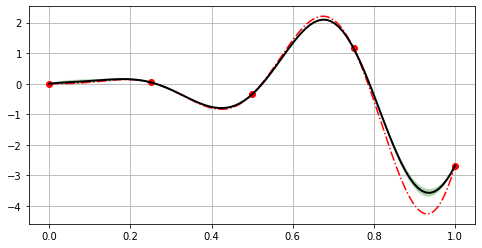

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(X2,Ye,'ro')
plt.plot(X_plot,f_e,'r-.')
#plt.plot(X_plot,f_c,'b.')
plt.plot(X_test[:,0],y_mean,'k-',linewidth=2)
plt.fill_between(np.array(X_test[:,0]).flatten(),np.array(y_up).flatten(),np.array(y_down).flatten(),facecolor='g',alpha=0.3)
plt.grid()
plt.show()

In [7]:
fig.savefig('linearB_AR1.pdf', bbox_inches='tight')

In [8]:
%pylab inline
import pylab as pb
pylab.ion()
import GPy

Populating the interactive namespace from numpy and matplotlib


In [9]:
K1 = GPy.kern.Bias(1)
K2 = GPy.kern.Linear(1)
K3 = GPy.kern.Matern32(1)
lcm = GPy.util.multioutput.LCM(input_dim=1,num_outputs=2,kernels_list=[K1,K2,K3])

m = GPy.models.GPCoregionalizedRegression([X1,X2],[Yc,Ye],kernel=lcm)
m['.*ICM.*var'].unconstrain()
m['.*ICM0.*var'].constrain_fixed(1.)
m['.*ICM0.*W'].constrain_fixed(0)
m['.*ICM1.*var'].constrain_fixed(1.)
m['.*ICM1.*W'].constrain_fixed(0)
m.optimize()

In [10]:
#m.optimize_restarts(num_restarts = 2)

In [11]:
Xt1 = np.random.rand(100)[:,None]*1.2
Xt2 = np.random.rand(100)[:,None]*1.2

Yt1 = f_low(Xt1)
Yt2 = f_high(Xt2)

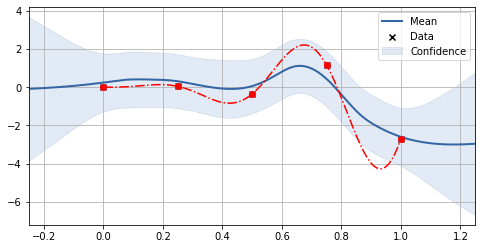

In [12]:
#fig = pb.figure(figsize=(8,4))
fig, ax = plt.subplots(figsize=(8, 4))
m.plot(fixed_inputs=[(1,1)],which_data_rows=slice(num_cheap,num_cheap+num_expensive),ax=ax)
plt.plot(X2,Ye,'ro')
plt.plot(X_plot,f_e,'r-.')
plt.grid()

In [13]:
fig.savefig('linearB_LCM.pdf', bbox_inches='tight')